### # Domain Knowledge 2 : 광고성과지표
| 광고성과지표 | = | 계산식 |
|:---------- |---------- |:---------- |
|CTR(Click Through Rate)|=|클릭수 / 노출수 * 100|
|CPM(Cost Per Mile)|=|광고비용 / 노출수 * 1000|
|CPC(Cost Per Click)|=|광고비용 / 클릭수|
|CPA(Cost Per Action)|=|광고비용 / 구매수|

----------------------

In [49]:
import pandas as pd
from pandas import DataFrame
from pandas import Series

import matplotlib.pyplot as plt

In [3]:
# matplotlib 한글 폰트 출력코드
# 출처 : 데이터공방( https://kiddwannabe.blog.me)

import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False   

In [22]:
df=pd.read_excel('./data/네이버보고서.xls', utf='kr',skiprows=[0])
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   광고그룹             1381 non-null   object 
 1   키워드              1381 non-null   object 
 2   노출수              1381 non-null   int64  
 3   클릭수              1381 non-null   float64
 4   클릭률(%)           1381 non-null   float64
 5   평균클릭비용(VAT포함,원)  1381 non-null   float64
 6   총비용(VAT포함,원)     1381 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 75.6+ KB


In [37]:
df.describe()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
count,1.381000e+03,1381.000000,1381.000000,1381.000000,1.381000e+03
mean,3.505415e+04,52.530630,0.352918,981.631962,3.791958e+04
std,2.964650e+05,387.502772,1.000462,1372.389897,1.421492e+05
min,1.001000e+03,0.000000,0.000000,0.000000,0.000000e+00
25%,1.814000e+03,1.200000,0.010000,64.170000,7.700000e+01
50%,3.805000e+03,3.600000,0.060000,395.980000,2.123000e+03
75%,1.073400e+04,14.400000,0.240000,1302.810000,1.743500e+04
max,9.626374e+06,9606.000000,13.590000,9362.530000,2.512444e+06


In [46]:
df.columns

Index(['광고그룹', '키워드', '노출수', '클릭수', '클릭률(%)', '평균클릭비용(VAT포함,원)',
       '총비용(VAT포함,원)'],
      dtype='object')

In [64]:
# 항상 float 형식으로, 실수는 소수점 2자리로 반올림하여 출력
pd.set_option('display.float_format', '{:.2f}'.format) 

In [ ]:
df.isnull().sum() #칼럼 단위 결측치 확인
# df.isnull().sum(axis=1) #행 단위 결측치 확인

In [47]:
print('행과 열 : ', df.shape)
print('광고그룹 고유 개수 :', df['광고그룹'].nunique())
print('키워드 고유 개수 : ', df['키워드'].nunique())

행과 열 :  (1381, 7)
광고그룹 고유 개수 : 186
키워드 고유 개수 :  1112


In [48]:
df['광고그룹'].value_counts()

올인원 패키지 : 업무자동화_3. 엑셀            93
AOP 전체_중복키워드_디자인                 57
#000_마케팅 전체_main                 48
ㅍAOP 전체_중복키워드_디자인(삭제)            46
1. 전체                            26
                                 ..
올인원 패키지 : 디지털 마케팅_2. 페이스북 광고      1
올인원 패키지 : 파이썬 웹 개발_3.FLASK기초      1
올인원 패키지 : 1인 쇼핑몰 시작하기_04.호스팅사     1
올인원 패키지 : 영상 제작/편집_10.패캠강의        1
프론트엔드 개발 스쿨 12기_기존 키워드            1
Name: 광고그룹, Length: 186, dtype: int64

### ▼

In [50]:
df['노출수'].sort_values(ascending=False)

4       9626374
173     3095998
0       2319456
9       1887822
13      1470452
         ...   
442        1007
983        1006
597        1005
445        1003
1057       1001
Name: 노출수, Length: 1381, dtype: int64

In [59]:
imp_sort = df['노출수'].sort_values()
imp_sort = imp_sort.reset_index() #기본 인덱스 설정
imp_sort.head()

,index,노출수
0,1057,1001
1,445,1003
2,597,1005
3,983,1006
4,442,1007


In [60]:
imp_sort.drop('index',axis=1)
imp_sort.head()

,index,노출수
0,1057,1001
1,445,1003
2,597,1005
3,983,1006
4,442,1007


In [61]:
imp_sort.drop('index',axis=1,inplace=True)
imp_sort.head()

,노출수
0,1001
1,1003
2,1005
3,1006
4,1007


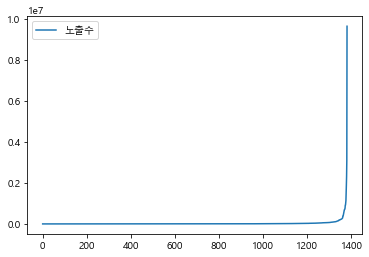

In [62]:
imp_sort.plot()
plt.show()

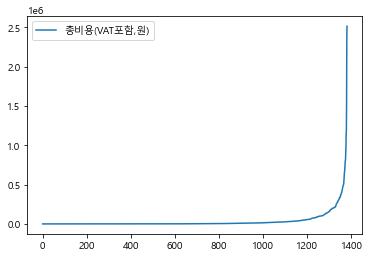

In [63]:
(((df['총비용(VAT포함,원)'].sort_values()).reset_index()).drop('index',axis=1)).plot()
plt.show()

In [28]:
# 형 변환

clk = df['클릭수']
clk = clk.astype(int)

pandas.core.series.Series

## 중점관리키워드 추출
- 노출수, 클릭수 기준 상위 5%에 해당하는 키워드 추출 
 1. 95백분위수 찾기(quantile 함수 사용)
 2. 95백분위수 이상(상위 5%)의 노출수 추출
 3. 상위 5%에 해당하는 키워드 추출

In [65]:
df.describe()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
count,1381.00,1381.00,1381.00,1381.00,1381.00
mean,35054.15,52.53,0.35,981.63,37919.58
std,296465.03,387.50,1.00,1372.39,142149.16
min,1001.00,0.00,0.00,0.00,0.00
25%,1814.00,1.20,0.01,64.17,77.00
50%,3805.00,3.60,0.06,395.98,2123.00
75%,10734.00,14.40,0.24,1302.81,17435.00
max,9626374.00,9606.00,13.59,9362.53,2512444.00


In [67]:
imp=df['노출수']

# impo의 4분위수 중위값 출력
print(imp.quantile())
print(imp.median())

3805.0
3805.0


In [69]:
# impo의 4분위 수 최소값 출력 min==0
print(imp.quantile(0))
print(imp.min())

# impo의 4분위 수 최대값 출력 max==1
print(imp.quantile(1))
print(imp.max())

1001.0
1001
9626374.0
9626374


In [71]:
# 5백분위수 이상(상위 5%)의 노출수 추출
#95백분위수 = quantile(0.95)

imp.quantile(0.95)

82858.0

In [72]:
df_index=df.set_index('키워드')
df_index.head()

,광고그룹,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
키워드,,,,,,
-,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,2319456,9606.00,0.41,261.55,2512444
-,올인원 패키지 : 업무자동화_VBA,767491,8058.00,1.05,295.97,2384965
일러스트,ㅍAOP 전체_중복키워드_디자인(삭제),1137840,324.00,0.03,4841.66,1568699
-,올인원 패키지 : 데이터 분석 입문 온라인_파콘,694106,1863.60,0.27,630.59,1175174
HTML,3. html,9626374,813.60,0.01,1408.44,1145903


In [73]:
imp=df_index['노출수']

In [74]:
#imp 변수 출력, 노출수 상위 5% 키워드 추출
imp=imp[imp>=imp.quantile(0.95)]

In [75]:
imp

키워드
-         2319456
-          767491
일러스트      1137840
-          694106
HTML      9626374
           ...   
부동산스터디     196862
가상메모리       94933
프로모션        82858
앱스토어       126393
OS          90041
Name: 노출수, Length: 70, dtype: int64

In [76]:
#df_index에서 클릭수 상위 5% 키워드 추출
clk=df_index['클릭수']
clk=clk[clk>=clk.quantile(0.95)]
clk

키워드
-         9606.00
-         8058.00
일러스트       324.00
-         1863.60
HTML       813.60
            ...  
재태크        126.00
모스자격증      198.00
펀드하는법      248.40
채권투자       135.60
주식투자하는법    120.00
Name: 클릭수, Length: 70, dtype: float64

In [77]:
imp=df_index['노출수']
clk=df_index['클릭수']

In [80]:
result=df_index[(imp>=imp.quantile(0.95))&(clk>=clk.quantile(0.95))]
result

,광고그룹,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
키워드,,,,,,
-,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,2319456,9606.00,0.41,261.55,2512444
-,올인원 패키지 : 업무자동화_VBA,767491,8058.00,1.05,295.97,2384965
일러스트,ㅍAOP 전체_중복키워드_디자인(삭제),1137840,324.00,0.03,4841.66,1568699
-,올인원 패키지 : 데이터 분석 입문 온라인_파콘,694106,1863.60,0.27,630.59,1175174
HTML,3. html,9626374,813.60,0.01,1408.44,1145903
파이썬,6. 파이썬,384522,260.40,0.07,3705.36,964876
코딩,1. 코딩,562162,271.20,0.05,3243.22,879560
C언어,2. C언어 일반,271370,153.60,0.06,5269.26,809358
가상화폐,프로그래밍 전체_파워컨텐츠_블록체인(삭제),91369,2838.00,3.11,283.22,803770


In [82]:
result.index

Index(['-', '-', '일러스트', '-', 'HTML', '파이썬', '코딩', 'C언어', '가상화폐', '포토샵',
       '블록체인', '엑셀', '-', '포토샵', '컴퓨터활용능력', '컴퓨터활용능력2급', '컴퓨터활용능력1급', '포토샵',
       '-', '프리미어프로', '폰트', '스케치', '포토샵', '글씨체', '한글폰트', '마블', '바이럴마케팅'],
      dtype='object', name='키워드')

### # 저효율키워드 선별

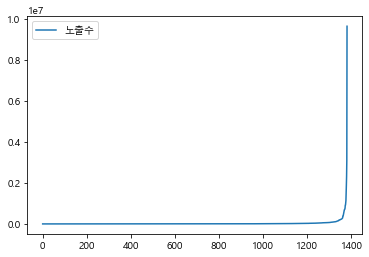

In [84]:
#노출수 선그래프
imp_sort.plot()
plt.show()

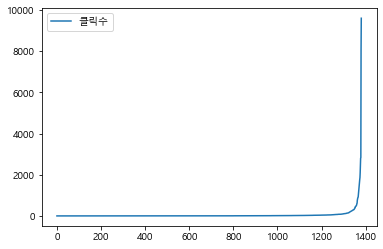

In [85]:
#클릭수 선그래프
(((df['클릭수'].sort_values()).reset_index()).drop('index',axis=1)).plot()
plt.show()

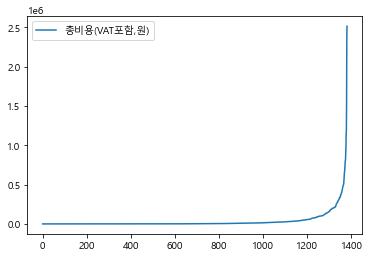

In [86]:
#총비용 선그래프
(((df['총비용(VAT포함,원)'].sort_values()).reset_index()).drop('index',axis=1)).plot()
plt.show()

- 노출수, 클릭수  기준 상위 5%의 키워드가 아닌데도 불구하고 비용이 많이 쓰이고 있는 키워드
 1. 노출수 95백분위수 미만
 2. 클릭수 95백분위수 미만
 3. 총비용 85백분위수 이상
 4. 총비용 95백분위수 미만
 
 ### # 조건이 여러개일  경우 
 - 데이터프레임[(조건문)&(조건문)]

In [87]:
cost=df_index['총비용(VAT포함,원)']

In [91]:
result=df_index[(imp<imp.quantile(0.95))&(clk<clk.quantile(0.95))&(cost>=cost.quantile(0.85))&(cost<cost.quantile(0.95))]
result.shape

(97, 6)

In [ ]:
# 위와 같음. 표현식이 다를뿐
result = df_index[(df_index['노출수']<df_index['노출수'].quantile(0.95))&(df_index['클릭수']<df_index['클릭수'].quantile(0.95))
        &(df_index['총비용(VAT포함,원)']>=df_index['총비용(VAT포함,원)'].quantile(0.85))
        &(df_index['총비용(VAT포함,원)']<df_index['총비용(VAT포함,원)'].quantile(0.95))]
result.shape

In [96]:
result.index

Index(['온라인마케팅교육', '온라인마케팅', '어플제작비용', '부동산경매', '퍼포먼스마케팅', '블록체인', 'C++',
       '게임만드는프로그램', '엑셀배우기', '앱만들기', '영상제작', '쇼핑몰제작', '에프터이펙트', '어플리케이션제작',
       '강남빌딩매매', '웹디자인', '디지털마케팅', '포토샵강의', '구글애널리틱스자격증', 'PYTHON', '페이스북광고',
       '유튜브마케팅', '게임제작', '부동산투자', '마케팅전략', 'PYTHON', '홈페이지만들기', 'B2B사이트',
       'JAVASCRIPT', '파이썬강좌', '인스타그램광고', '동영상제작', 'SEO', '쇼핑몰창업', '인터넷쇼핑몰',
       '게임프로그래밍학원', '프로그래밍', '서울빌딩매매', '데이터사이언스', '모바일게임제작', '엑셀학원',
       '유튜브크리에이터', '엑셀VBA', '영상편집학원', '텐서플로우', '쇼핑몰홈페이지제작', '엑셀교육', '그로스해킹',
       '게임개발', '광고대행사', '통계학원', '모바일앱개발', '안드로이드앱만들기', '파이썬기초', '하이브리드앱',
       '온라인마케팅', '인디자인', '검색엔진최적화', '엑셀실무', '인터넷쇼핑몰제작', '상가빌딩매매', '퍼포먼스마케팅',
       '쇼핑몰', 'UX디자인', '유니티강좌', 'VBA', '코딩이란', 'SNS마케팅', 'GA자격증', '콘텐츠제작',
       '구글애널리틱스', 'UI디자인', '1인미디어', '포토샵자격증', '하이브리드앱', '포토샵자격증', '브랜드네이밍',
       '리플렛디자인', '데이터사이언티스트', '유니티3D', '자바스크립트', '일러스트레이터강좌', '데이터분석준전문가',
       '유튜브편집', '모션그래픽', '리플렛디자인', 'SPRING', '어도비일러스트레이터', 'SNS광고', '쇼핑몰촬영',
       '브랜드마케팅', '데이터분

In [97]:
grouped=df.groupby('광고그룹')

In [98]:
#count - 각 광고그룹 데이터의 개수
grouped.count()

,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,,
#000_마케팅 전체_main,48,48,48,48,48,48
001.BASIC DESIGN,9,9,9,9,9,9
001.데이터분석/ 통계,10,10,10,10,10,10
002.R,9,9,9,9,9,9
002.UX/UI,5,5,5,5,5,5
...,...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,13,13,13,13,13,13
프로그래밍 유치원,8,8,8,8,8,8
프로그래밍 전체,12,12,12,12,12,12


In [99]:
#mean -각 광고그룹 데이터의 평균
grouped.mean()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,14780.15,8.40,0.18,625.09,7243.96
001.BASIC DESIGN,5738.56,6.80,0.23,298.69,2427.33
001.데이터분석/ 통계,3715.00,20.28,0.89,1021.47,19575.60
002.R,13413.78,8.53,0.11,360.04,4796.00
002.UX/UI,3090.80,4.08,0.09,69.93,550.00
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,72092.69,16.71,0.05,648.33,15781.62
프로그래밍 유치원,5921.62,7.80,0.22,2032.33,23617.00
프로그래밍 전체,90375.00,9.20,0.03,123.88,1626.17


In [100]:
#median - 그룹 데이터의 중앙값
grouped.median()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,2765.00,3.60,0.06,765.97,2458.50
001.BASIC DESIGN,5524.00,2.40,0.04,357.50,1023.00
001.데이터분석/ 통계,1813.00,13.80,0.57,1096.80,13464.00
002.R,5184.00,3.60,0.03,119.17,1287.00
002.UX/UI,2649.00,1.20,0.09,73.33,88.00
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,5763.00,3.60,0.02,852.50,2706.00
프로그래밍 유치원,3748.00,3.00,0.12,1763.82,8002.50
프로그래밍 전체,3455.50,1.20,0.01,130.50,225.50


>#std 
>>그룹 데이터의 표준편차
- grouped.std()

>#var 
>>그룹 데이터의 분산
- grouped.var()

In [103]:
#그룹데이터의 합계(sum) - 노출수,클릭수,총비용 칼럼
df_group=grouped.sum()
df_group

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,403.20,8.84,30004.18,347710
001.BASIC DESIGN,51647,61.20,2.09,2688.25,21846
001.데이터분석/ 통계,37150,202.80,8.90,10214.74,195756
002.R,120724,76.80,1.01,3240.35,43164
002.UX/UI,15454,20.40,0.45,349.64,2750
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,937205,217.20,0.66,8428.27,205161
프로그래밍 유치원,47373,62.40,1.78,16258.61,188936
프로그래밍 전체,1084500,110.40,0.30,1486.58,19514


In [104]:
#클릭률(ctr) = 클릭수 / 노출수
#데이터전처리 - 데이터프레임의 열 단위 수치연산
df_group['클릭률(%)']=df_group['클릭수']/df_group['노출수']

In [106]:
#평균클릭비용(cpc) = 총비용 / 클릭수
#데이터전처리 - 데이터프레임의 열 단위 수치연산
df_group['평균클릭비용(VAT포함,원)']=df_group['총비용(VAT포함,원)']/df_group['클릭수']

In [108]:
#클릭수 칼럼 중 0인 데이터가 존재 => 평균클릭비용 칼럼 중 결측값이 존재
df_group[df_group['클릭수']==0]

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
Hyperledger Fabric 프로젝트 CAMP,1990,0.00,0.00,0.00,0
fin_camp_business_4,2136,0.00,0.00,0.00,0
fin_camp_rfs_9,1928,0.00,0.00,0.00,0
다함께 DDD 프로젝트,3689,0.00,0.00,0.00,0
올인원 패키지 : 디지털 마케팅_인스타광고,1377,0.00,0.00,0.00,0


In [109]:
# fillna - 전달된 값으로 결측값을 대체하는 함수 
#평균클릭비용
df_group['평균클릭비용(VAT포함,원)']=df_group['평균클릭비용(VAT포함,원)'].fillna(0)

In [110]:
# 평균클릭비용 칼럼 반올림처리(round), 소수점 제거(astype(int)
df_group['평균클릭비용(VAT포함,원)']=round(df_group['평균클릭비용(VAT포함,원)'],0)
df_group['평균클릭비용(VAT포함,원)']=df_group['평균클릭비용(VAT포함,원)'].astype(int)

In [111]:
#head()
df_group.head()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,403.20,0.00,862,347710
001.BASIC DESIGN,51647,61.20,0.00,357,21846
001.데이터분석/ 통계,37150,202.80,0.01,965,195756
002.R,120724,76.80,0.00,562,43164
002.UX/UI,15454,20.40,0.00,135,2750


## CTR(클릭률) : 클릭수/노출수*100

In [31]:
df['클릭률(%)'] = round(df['클릭수']/df['노출수']*100, 2)
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.41,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.05,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.03,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.27,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.01,1408.435349,1145903


In [33]:
# 평균클릭비용(VAT포함,원) 칼럼의 반올림 처리

df['평균클릭비용(VAT포함,원)'] = round(df['평균클릭비용(VAT포함,원)'],2)
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.41,261.55,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.05,295.97,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.03,4841.66,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.27,630.59,1175174
4,3. html,HTML,9626374,813.6,0.01,1408.44,1145903
